In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
%matplotlib inline

In [4]:
df= pd.read_csv(r"C:\Users\HP\Masaüstü/avocado.csv")
# df= pd.read_csv("avocado.csv")



In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True) 

We dropped Unnamed : 0 feature because it is useless to keep it

In [7]:
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

We splitted Date Feature so we can be able to use day and month columns for regression model

In [10]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Text(0.5, 1.0, 'Average Price')

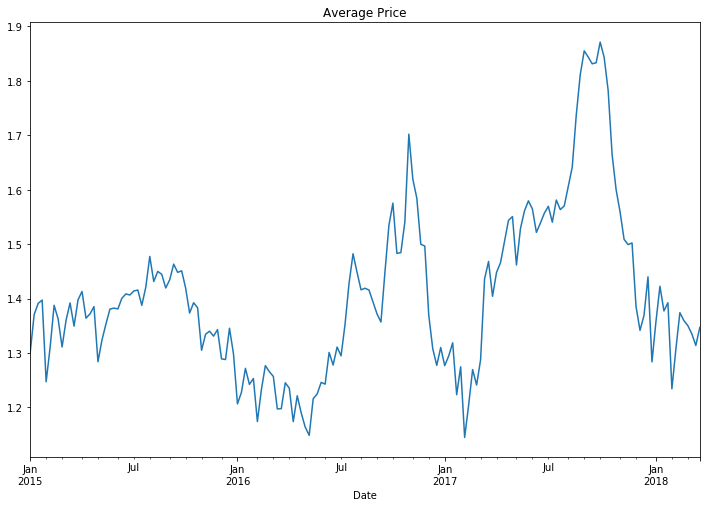

In [11]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

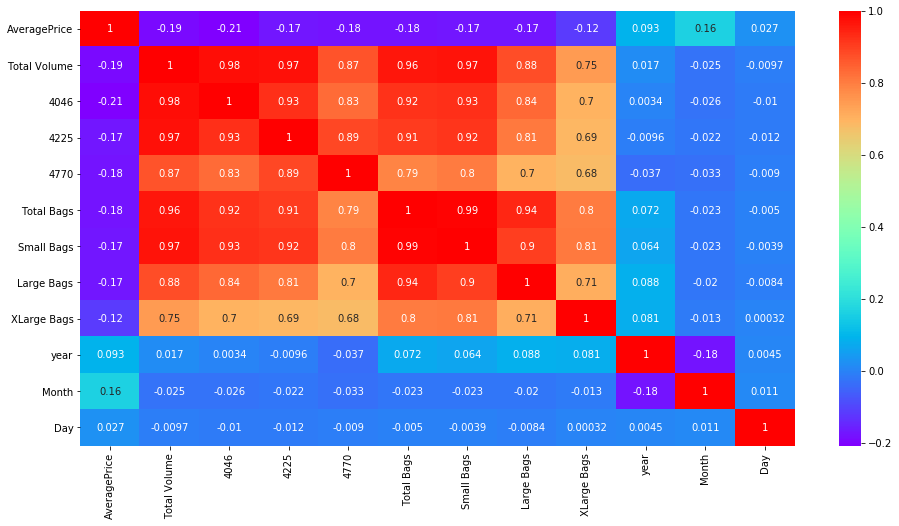

In [12]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap='rainbow',annot=True)


All the features are correlated with each other,not corroleted with the Average Price column.

In [13]:
df['region'].nunique()

54

In [14]:
df['type'].nunique()


2

In [15]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

We thought it is going to be easy to transform type feature,region is a complex so We dropped the region column.Also Date feature is not necessary because We have already three column about date.

In [16]:
df_final.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


In [17]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


We split up data into X array that contains the features to train on, and  y array with the target variable

In [18]:
SuportVectorRegModel=SVR()
SuportVectorRegModel.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
spred =SuportVectorRegModel.predict(X_test)
spred

array([1.3038525 , 1.11510369, 1.58029837, ..., 0.71778998, 1.55924237,
       1.49102012])

In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, spred))
print('MSE:', metrics.mean_squared_error(y_test, spred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, spred)))

MAE: 0.24996007922382882
MSE: 0.10699415356840278
RMSE: 0.32709960802239246


Text(0, 0.5, 'Predicted Y')

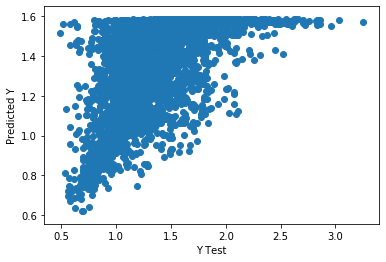

In [21]:
plt.scatter(x=y_test,y=spred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [22]:
data = pd.DataFrame({'Y Test':y_test , 'SVRPred':spred},columns=['Y Test','SVRPred'])
data.head()

,Y Test,SVRPred
8604,0.82,1.303852
2608,0.97,1.115104
14581,1.44,1.580298
4254,0.97,1.235375
16588,1.45,1.573564


We evaluate our model by finding the root mean squared error produced by the model. 

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lpred=lr.predict(X_test)

In [24]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, lpred))
print('MSE:', metrics.mean_squared_error(y_test, lpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lpred)))

MAE: 0.2329713329170077
MSE: 0.0910880280536491
RMSE: 0.3018079323902026


The RMSE is low so We can say that We have a good model but below in the scatter plot doesn't have straight line.Linear regression's Rmse is lower than Support vector regression's Rmse.Thats why Linear regression algorithm model better than  Support vector regression algorithm.

Text(0, 0.5, 'Predicted Y')

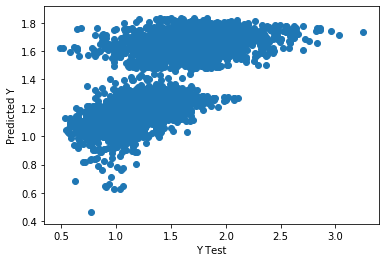

In [25]:
plt.scatter(x=y_test,y=lpred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [26]:
data = pd.DataFrame({'Y Test':y_test , 'LRPred':lpred},columns=['Y Test','LRPred'])
data.head()

,Y Test,LRPred
8604,0.82,1.163895
2608,0.97,1.168086
14581,1.44,1.550844
4254,0.97,1.070764
16588,1.45,1.618120


In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dpred=dtr.predict(X_test)

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, dpred))
print('MSE:', metrics.mean_squared_error(y_test, dpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dpred)))

MAE: 0.1371123287671233
MSE: 0.044729589041095884
RMSE: 0.2114937092234563


Text(0, 0.5, 'Predicted Y')

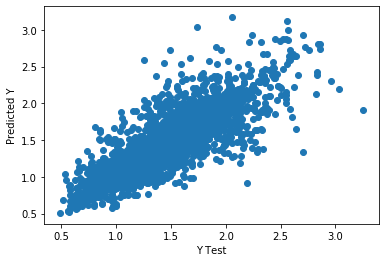

In [29]:
plt.scatter(x=y_test,y=dpred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

The RMSE is lower than Lineer Regression RMSE and nearly have a straigt line.The decision tree regressor better than the Linear regression model.

In [30]:
data = pd.DataFrame({'Y Test':y_test , 'DTRPred':dpred},columns=['Y Test','DTRPred'])
data.head()

,Y Test,DTRPred
8604,0.82,0.80
2608,0.97,0.99
14581,1.44,1.34
4254,0.97,0.94
16588,1.45,1.45


In [31]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
rpred=rdr.predict(X_test)

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, rpred))
print('MSE:', metrics.mean_squared_error(y_test, rpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rpred)))

MAE: 0.10106383561643836
MSE: 0.021481513123287665
RMSE: 0.14656572970270937


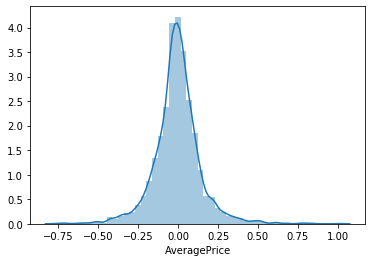

In [33]:
sns.distplot((y_test-rpred),bins=50)

In [34]:
data = pd.DataFrame({'Y Test':y_test , 'RFRPred':rpred},columns=['Y Test','RFRPred'])
data.head()

,Y Test,RFRPred
8604,0.82,0.9482
2608,0.97,0.9957
14581,1.44,1.4200
4254,0.97,0.9027
16588,1.45,1.4452


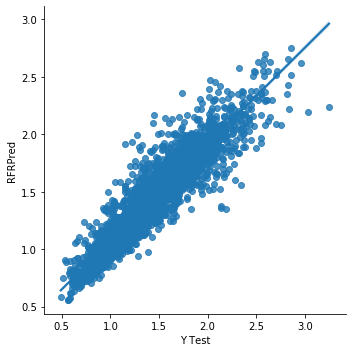

In [35]:
sns.lmplot(x='Y Test',y='RFRPred',data=data,palette='rainbow')

The RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case. looked distributed plot that our residuals looked to be normally distributed which means that our model was a correct choice for the data.Finally We have straight line in best model.

In [36]:
data = pd.DataFrame({'Y Test':y_test , 'RFRPred':rpred , 'DTRPred':dpred , 'LRPred':lpred ,'SVRPred':spred },columns=['Y Test','RFRPred','DTRPred','LRPred','SVRPred'])
data.head()

,Y Test,RFRPred,DTRPred,LRPred,SVRPred
8604,0.82,0.9482,0.80,1.163895,1.303852
2608,0.97,0.9957,0.99,1.168086,1.115104
14581,1.44,1.4200,1.34,1.550844,1.580298
4254,0.97,0.9027,0.94,1.070764,1.235375
16588,1.45,1.4452,1.45,1.618120,1.573564


In [37]:
lr_rmse= metrics.mean_squared_error(y_test, lpred, squared=False)
svr_rmse = metrics.mean_squared_error(y_test, spred, squared=False)
dtr_rmse = metrics.mean_squared_error(y_test, dpred, squared=False)
rfr_rmse = metrics.mean_squared_error(y_test, rpred, squared=False)

df_rmse = pd.DataFrame({'Y Test':0 , 'RFRPred':rfr_rmse , 'DTRPred':dtr_rmse , 'LRPred':lr_rmse ,'SVRPred':svr_rmse },columns=['Y Test','RFRPred','DTRPred','LRPred','SVRPred'], index= ['RMSE'])
df_rmse

,Y Test,RFRPred,DTRPred,LRPred,SVRPred
RMSE,0,0.146566,0.211494,0.301808,0.3271


In [38]:
data = data.reset_index(drop=True).append(df_rmse)
data.tail()

,Y Test,RFRPred,DTRPred,LRPred,SVRPred
3646,1.67,1.675400,1.560000,1.688836,1.578175
3647,0.59,0.620800,0.660000,0.986929,0.717790
3648,1.92,1.701000,1.570000,1.697867,1.559242
3649,1.79,2.167500,2.410000,1.717019,1.491020
RMSE,0.00,0.146566,0.211494,0.301808,0.327100


In [39]:
data.loc['RMSE',:]

Y Test     0.000000
RFRPred    0.146566
DTRPred    0.211494
LRPred     0.301808
SVRPred    0.327100
Name: RMSE, dtype: float64

According to comprasion of model's RMSE ,we can see which model is the best choice for our dataset. Random forest regression has minimum RMSE value in the table.In this case our best model is Random Forest Regression.